In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use("seaborn")

In [106]:
mean_1 = np.array([1,0.5])
cov_1 = np.array([[1,0.1],[0.1,1.2]])

mean_2 = np.array([4,5])
cov_2 = np.array([[1.21,0.1],[0.1,1.3]])

dist_01 = np.random.multivariate_normal(mean_1,cov_1,500)
dist_02 = np.random.multivariate_normal(mean_2,cov_2,500)

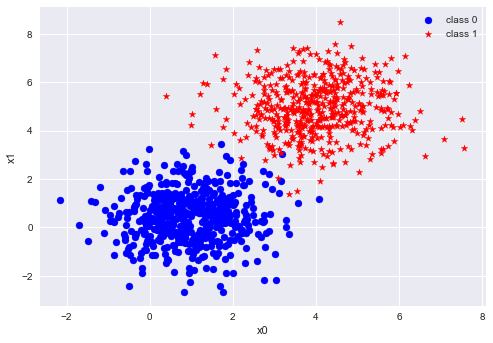

In [107]:
plt.figure()
plt.scatter(dist_01[:,0],dist_01[:,1],color="blue",label="class 0")
plt.scatter(dist_02[:,0],dist_02[:,1],color="red",marker="*",label="class 1")
plt.xlabel("x0")
plt.ylabel("x1")
plt.legend()
plt.show()

In [108]:
def hypothesis(X,theta,b):
    return sigmoid(np.dot(X,theta) + b)

def sigmoid(z):
    return (1.0)/(1.0+np.exp(-z))

def error(X,y,theta,b):
    err=0.0
    m = X.shape[0]
    for i in range(m):
        hx = hypothesis(X[i],theta,b)
        err += y[i]*np.log2(hx) + (1 - y[i])*np.log2(1-hx)
    return -err/m

def gradient(X,y,theta,b):
    m = X.shape[0]
    grad_w = np.zeros(theta.shape)
    grad_b = 0.0
    for i in range(m):
        hx = hypothesis(X[i],theta,b)
        grad_w += ( y[i] - hx ) * X[i]
        grad_b += ( y[i] - hx )
    return [grad_w/m,grad_b/m]

def gradient_descent(X,y,w,b,lr=0.5):
    er = error(X,y,w,b)
    [grad_w,grad_b] = gradient(X,y,w,b)
    
    w = w + lr*grad_w
    b = b + lr*grad_b
    
    return er,w,b
def accuracy(X_test,y_test,w,b):
    y_pred = []
    for i in range(X_test.shape[0]):
        p = predict(X_test[i],w,b)
        y_pred.append(p)
        
    y_pred =np.array(y_pred)
    return ((y_test==y_pred).sum())/y_test.shape
    
def predict(X,w,b):
    confidence = hypothesis(X,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    

In [109]:
data = np.zeros((1000,3))
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

np.random.shuffle(data)

X,y = data[:,:2],data[:,-1]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [110]:
error_list = []
acc = []

w = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

for i in range(1000):
    err,w,b = gradient_descent(X_train,y_train,w,b,lr=0.1)
    error_list.append(err)
    a = accuracy(X_test,y_test,w,b)
    acc.append(a)

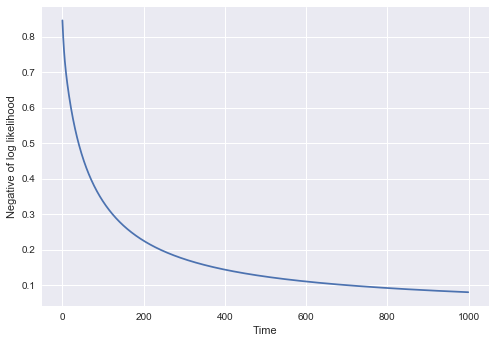

In [111]:
plt.plot(error_list)
plt.ylabel("Negative of log likelihood")
plt.xlabel("Time")
plt.show()

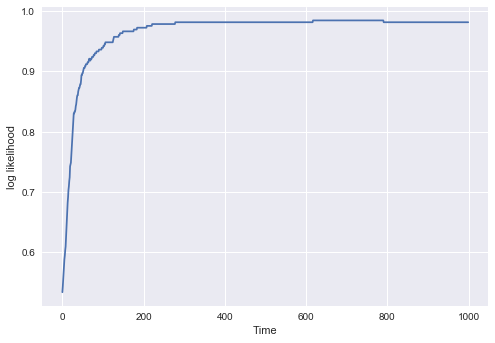

In [112]:
plt.plot(acc)
plt.ylabel("log likelihood")
plt.xlabel("Time")
plt.show()

In [113]:
y_pred = -(w[1]*X_train+b)/w[0]

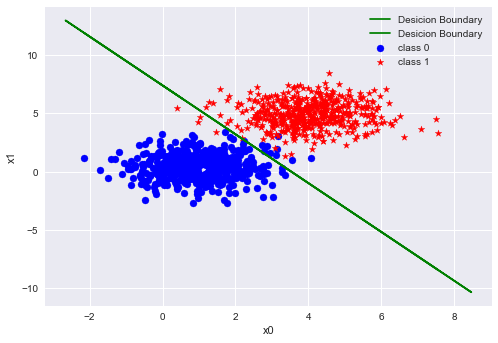

In [114]:
plt.figure()
plt.scatter(dist_01[:,0],dist_01[:,1],color="blue",label="class 0")
plt.scatter(dist_02[:,0],dist_02[:,1],color="red",marker="*",label="class 1")
plt.plot(X_train,y_pred,color="green",label="Desicion Boundary")
plt.xlabel("x0")
plt.ylabel("x1")
plt.legend()
plt.show()